# Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib as mp
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix 
!pip install --upgrade yellowbrick
from yellowbrick.text import TSNEVisualizer

# Import Dataset

In [ ]:
from google.colab import files
try:  
  src = list(files.upload().values())[0]
except:
  print("no file selected")

Saving pendigits-tes.csv to pendigits-tes (1).csv
Saving pendigits-tra.csv to pendigits-tra (1).csv


In [ ]:
train_data = pd.read_csv("pendigits-tra.csv",header=None)
test_data = pd.read_csv("pendigits-tes.csv",header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [ ]:
trY = train_data[16]
trX = train_data.drop([16],axis=1)
teY = test_data[16]
teX = test_data.drop([16],axis=1)

# Part 1

## initializing the baselines for each model

In [ ]:
baselines = {"DecisionTree":[],"Multi_layer_perceptron":[],"SVM":[]}
parts = {'q1':[],'q2':[],'q3':[]}
models = {'q1':[],'q2':[],'q3':[]}

## Decision Tree



In [ ]:
def DecisionTree(trX=trX,teX=teX,maxDepth=None,minSamplesLeaf= 1):
  model = DecisionTreeClassifier(max_depth= maxDepth, min_samples_leaf=minSamplesLeaf)
  model.fit(trX,trY)
  predict = model.predict(teX)
  accuracy = accuracy_score(teY, predict)
  return model,accuracy

In [ ]:
model,dtAcc = DecisionTree()
baselines['DecisionTree'].append(dtAcc)
parts['q1'].append(dtAcc)
models['q1'].append(model)

## SVM

In [ ]:
def SVM(trX=trX,teX=teX,kernel='rbf',gamma='scale'):
  model = SVC(kernel=kernel, gamma=gamma,degree=2)
  model.fit(trX,trY)
  predict = model.predict(teX)
  accuracy = accuracy_score(teY, predict)
  return model,accuracy

In [ ]:
model,svmAcc = SVM()
baselines['SVM'].append(svmAcc)
parts['q1'].append(svmAcc)
models['q1'].append(model)

## Multi Layer Perceptron

In [ ]:
def Multi_layer_perceptron(trX=trX,teX=teX,activation_function = 'relu', hidden_layer_size = (100,), learning_rate=0.001):
  accuracy = []
  model = MLPClassifier(activation=activation_function, hidden_layer_sizes=hidden_layer_size, learning_rate_init=learning_rate,early_stopping=True)
  for i in range(10):
    model.fit(trX,trY)
    predict = model.predict(teX)
    accuracy.append(accuracy_score(teY, predict))
  return model,Average(accuracy)

In [ ]:
def Average(list):
    return sum(list) / len(list)

In [ ]:
model,mlpaAcc = Multi_layer_perceptron()
baselines['Multi_layer_perceptron'].append(mlpaAcc)
parts['q1'].append(mlpaAcc)
models['q1'].append(model)

# Plots

In [ ]:
def models_barPlot(lists):
  lists = [round(item,2) for item in lists]
  width = 0.35 # the width of the bars
  fig, ax = plt.subplots()
  fig.set_size_inches(10, 6)
  ax.set_title('Accuracy')
  pps = ax.bar(["SVM","MLP","DecisionTree"], lists, width ,label=lists, color=['grey', 'pink', 'lightblue', 'darkred'][0:len(lists)])
  for p in pps:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3), # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')
  plt.show()


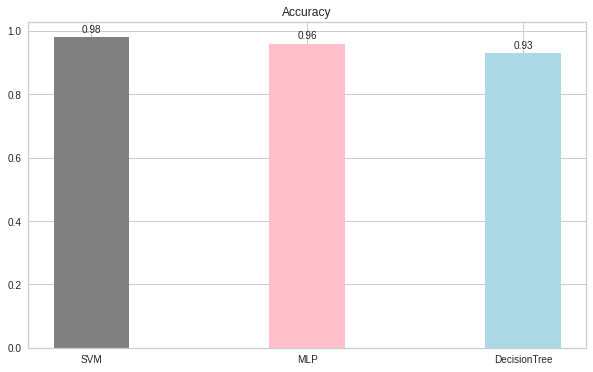

In [ ]:
models_barPlot(baselines['SVM']+baselines['Multi_layer_perceptron']+baselines['DecisionTree'])

# Part 2

In [ ]:
def k_features_selection(n):
  model= SelectKBest(k=n)
  features = model.fit(trX, trY).get_support()
  trX_new = model.fit_transform(trX,trY)
  teX_new = model.fit_transform(teX, teY)
  features= getFeatures(features.tolist())
  return trX_new,teX_new,features

In [ ]:
def getFeatures(features):
  new_features = []
  for i in range(len(features)):
    if features[i]:
      new_features.append(i)
  return new_features

In [ ]:
def visualize_TSNE(title,X, labels):
  tsne = TSNEVisualizer(decompose=None, random_state=125)
  tsne.fit(X, labels)
  print(title)
  tsne.show()

In [ ]:
def model_feature_performance(model,model_name,k_features,baseline):
  accuracies = []
  for k_feature in k_features:
    trX_new , teX_new , featuresList = k_features_selection(k_feature)
    model_after,accuracy_after = model(trX=trX_new,teX=teX_new)
    accuracies.append(accuracy_after)
    baselines[model_name].append(accuracy_after)
  plot_model_feature_performance(model_name,k_features,accuracies,baseline,'Features')

In [ ]:
def plot_model_feature_performance(title,x,y,baseline,xlabel):
  plt.plot(x,y,marker='o',label='Workpiece')
  plt.plot(x,[max(baseline)]*3,label='Baseline',color='red')
  plt.xlabel(xlabel)
  plt.ylabel("Accuracy")
  plt.title("Accuracy performance for "+title)
  plt.legend()
  plt.show()

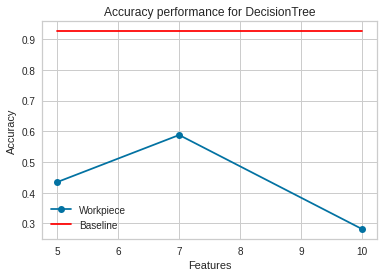

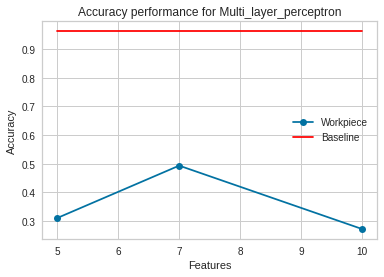

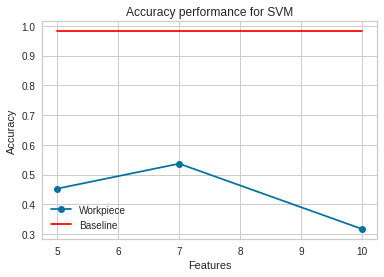

In [ ]:
k_features = [5,7,10]
models_names = ["DecisionTree","Multi_layer_perceptron","SVM"]
models = [DecisionTree,Multi_layer_perceptron,SVM]
q2_baselines = [baselines['DecisionTree'],baselines['Multi_layer_perceptron'],baselines['SVM']]

for model,model_name,baseline in zip(models,models_names,q2_baselines):
  model_feature_performance(model,model_name,k_features,baseline)

parts['q2'].append(max(baselines['DecisionTree'])) 
parts['q2'].append(max(baselines['SVM']))
parts['q2'].append(max(baselines['Multi_layer_perceptron']))

In [ ]:
def plot_before_after_tsne(k_features):
  for k_feature in k_features:
    visualize_TSNE("Before Applying TSNE for " + str(k_feature)+" Features" ,teX, teY)
    trX_new , teX_new , featuresList = k_features_selection(k_feature)
    visualize_TSNE("After Applying TSNE for " + str(k_feature)+" Features", teX_new,teY)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Before Applying TSNE for 5 Features


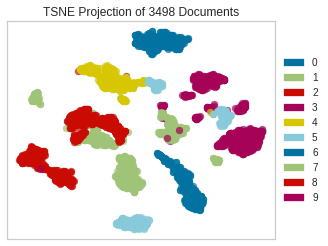

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

After Applying TSNE for 5 Features


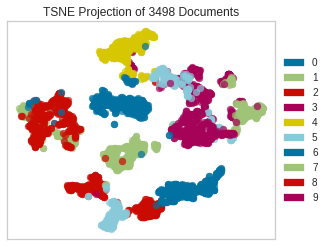

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Before Applying TSNE for 7 Features


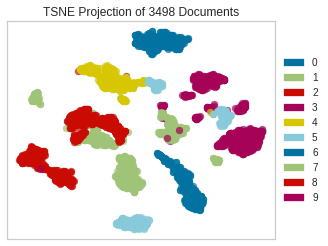

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

After Applying TSNE for 7 Features


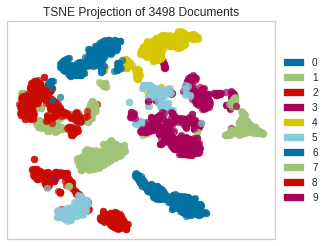

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Before Applying TSNE for 10 Features


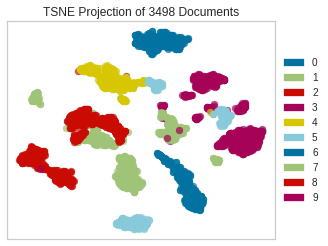

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

After Applying TSNE for 10 Features


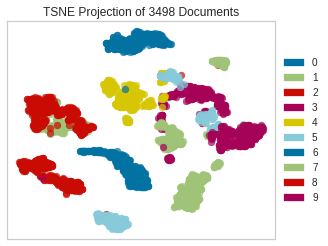

In [ ]:
plot_before_after_tsne(k_features)

From these graphs we can see obviously that there is no change in baselines for all models as their initial baselines are better than without feature selection

# Part 3

Helper Functions

In [ ]:
def evaluate_model(dt_classifier):
  dt_classifier = dt_classifier.fit(trX,trY)
  print("Test Accuracy :", accuracy_score(teY, dt_classifier.predict(teX))*100) 
  q3_accuracies.append(accuracy_score(teY, dt_classifier.predict(teX)))

In [ ]:
def plot_hyperparameters(tuning_list, xlabel, baseline, accuracies, baseline_len):
  plt.plot(baseline_len,[baseline, baseline], label='Baseline', color='red')
  plt.plot(tuning_list,accuracies,marker='o',label='Workpiece')
  plt.ylabel("Accuracy")
  plt.xlabel(xlabel)
  plt.title('Accuracy')
  plt.legend()
  plt.show()

**Decision Tree Tuning**

max_depth tuning

max_depth   = 5
Test Accuracy : 76.357918810749
max_depth   = 10
Test Accuracy : 90.62321326472271
max_depth   = 20
Test Accuracy : 92.08118925100057


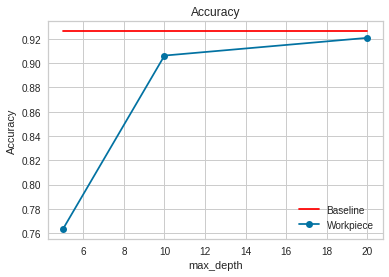

In [ ]:
q3_accuracies = []
max_depth = [5,10,20]
for i in max_depth:
  model = DecisionTreeClassifier(max_depth = i, random_state=0)
  print("max_depth"," ", "=",i )
  evaluate_model(model)
plot_hyperparameters(max_depth, "max_depth",max(baselines['DecisionTree']),q3_accuracies,[5, 20])
baselines['DecisionTree'].extend(q3_accuracies)

Min samples leaf tuning

min_samples_leaf   = 20
Test Accuracy : 86.87821612349914
min_samples_leaf   = 50
Test Accuracy : 82.50428816466552
min_samples_leaf   = 100
Test Accuracy : 78.3876500857633


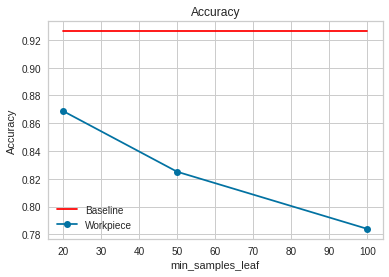

In [ ]:
q3_accuracies = []
min_samples_leaf= [20, 50, 100]
for i in min_samples_leaf:
  model = DecisionTreeClassifier(min_samples_leaf= i, random_state=0)
  print("min_samples_leaf"," ", "=",i )
  evaluate_model(model)
plot_hyperparameters(min_samples_leaf, "min_samples_leaf",max(baselines['DecisionTree']),q3_accuracies,[20, 100])
baselines['DecisionTree'].extend(q3_accuracies)

In [ ]:
parts['q3'].append(max(baselines['DecisionTree']))

**SVM Tuning**

C(Regularization parameter)

Regularization parameter    = 0.1
Test Accuracy : 95.19725557461408
Regularization parameter    = 1
Test Accuracy : 98.17038307604345
Regularization parameter    = 10
Test Accuracy : 98.25614636935391


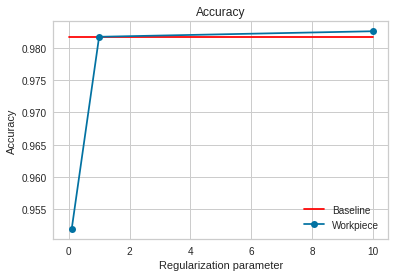

In [ ]:
q3_accuracies = []
C = [0.1, 1, 10]
for i in C:
  model = SVC(C=i, random_state=0)
  print("Regularization parameter "," ", "=",i )
  evaluate_model(model)
plot_hyperparameters(C, "Regularization parameter",max(baselines['SVM']),q3_accuracies,[0., 10])
baselines['SVM'].extend(q3_accuracies)

gamma tuning

gamma   = 1
Test Accuracy : 10.377358490566039
gamma   = 0.1
Test Accuracy : 11.092052601486564
gamma   = 0.01
Test Accuracy : 46.855345911949684


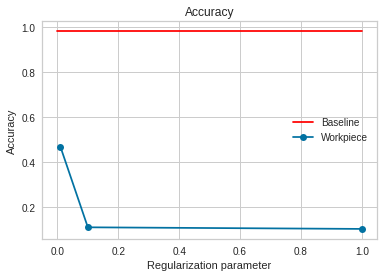

In [ ]:
q3_accuracies = []
gamma= [1, 0.1, 0.01]
for i in gamma:
  model = SVC(gamma=i,C=10, random_state=0)
  print("gamma"," ", "=",i )
  evaluate_model(model)
plot_hyperparameters(gamma, "Regularization parameter",max(baselines['SVM']),q3_accuracies, [0., 1])
baselines['SVM'].extend(q3_accuracies)

In [ ]:
parts['q3'].append(max(baselines['SVM']))

Multilayer Perceptron tuning

Solver tuning

solver   = sgd
Test Accuracy : 96.65523156089193
solver   = adam
Test Accuracy : 96.25500285877644
solver   = lbfgs
Test Accuracy : 96.68381932532876


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


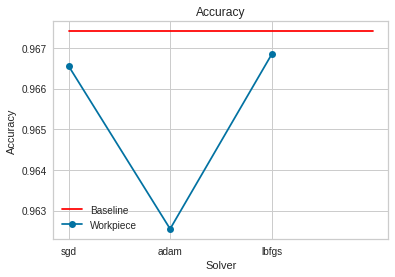

In [ ]:
q3_accuracies = []
solver = ['sgd', 'adam','lbfgs']
for i in solver:
  model = MLPClassifier(solver=i, random_state=0)
  print("solver"," ", "=",i)
  evaluate_model(model)
plot_hyperparameters(solver, "Solver",max(baselines['Multi_layer_perceptron']),q3_accuracies, [0., 3])
baselines['Multi_layer_perceptron'].extend(q3_accuracies)

Learning rate tuning

Learning Rate   = constant


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test Accuracy : 96.68381932532876
Learning Rate   = adaptive


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test Accuracy : 96.68381932532876
Learning Rate   = invscaling
Test Accuracy : 96.68381932532876


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


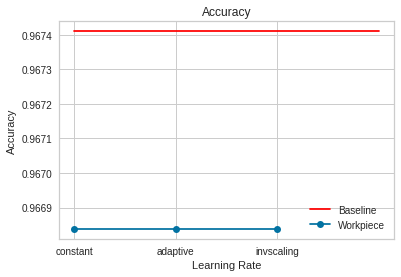

In [ ]:
q3_accuracies = []
learning_rate = ['constant','adaptive', 'invscaling']
for i in learning_rate:
  model = MLPClassifier(learning_rate=i, random_state=0,solver='lbfgs')
  print("Learning Rate"," ", "=",i )
  evaluate_model(model)
plot_hyperparameters(learning_rate, "Learning Rate",max(baselines['Multi_layer_perceptron']),q3_accuracies, [0., 3])
baselines['Multi_layer_perceptron'].extend(q3_accuracies)

In [ ]:
parts['q3'].append(max(baselines['Multi_layer_perceptron']))

# Part 4

## stacking approach

In [ ]:
questions['q4'] = []

In [ ]:
def Stacking(trX=trX,teX=teX):
  models = [
    ('mlp', MLPClassifier(learning_rate='adaptive',solver='sgd',random_state=0)),
    ('dt',DecisionTreeClassifier()),
    ('svm',SVC(C=10))
  ]
  model = StackingClassifier(estimators=models)
  model.fit(trX,trY)
  predict = model.predict(teX)
  accuracy = accuracy_score(teY, predict)
  return accuracy

In [ ]:
stackingAcc = Stacking()
questions['q4'].append(stackingAcc)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Random Forest

In [ ]:
def RandomCutForest(trX=trX,teX=teX):
  model = RandomForestClassifier()
  model.fit(trX,trY)
  predict = model.predict(teX)
  accuracy = accuracy_score(teY, predict)
  return accuracy

In [ ]:
randomCutForestAcc = RandomCutForest()
parts['q4'].append(randomCutForestAcc)

## Final Result bar plot

In [ ]:
def FinalrResultsBarplot(parts):
  partsResults = parts
  for key in partsResults.keys():
    parts[key] = [round(item,3) for item in parts[key]]
  N = len(partsResults)
  ind = np.arange(N) 
  width = 0.2
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 9)
  dtAcc = [partsResults['q1'][0],partsResults['q2'][0],partsResults['q3'][0],0]
  bar1 = ax.bar(ind, dtAcc, width, color = 'darkblue')
  for p in bar1:
      height = p.get_height()
      if height >0:
        ax.annotate('{}'.format(height),
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3), # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
      
  svmAcc = [partsResults['q1'][1],partsResults['q2'][1],partsResults['q3'][1],0]
  bar2 = ax.bar(ind+width, svmAcc, width, color='darkorange')
  for p in bar2:
      height = p.get_height()
      if height >0:
        ax.annotate('{}'.format(height),
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3), # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
    
  mlpAcc = [partsResults['q1'][2],partsResults['q2'][2],partsResults['q3'][2],0]
  bar3 =ax.bar(ind+width*2, mlpAcc, width, color = 'grey')
  for p in bar3:
      height = p.get_height()
      if height >0:
        ax.annotate('{}'.format(height),
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3), # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
  
  stacking = [0, 0, 0,partsResults['q4'][0]]
  bar4 = ax.bar(ind+width*3, stacking, width, color = 'teal')
  for p in bar4:
      height = p.get_height()
      if height >0:
        ax.annotate('{}'.format(height),
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3), # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
    
  rfAcc = [0, 0, 0,partsResults['q4'][1]]
  bar5 =ax.bar(ind+width*4, rfAcc, width, color = 'lightgreen')
  for p in bar5:
      height = p.get_height()
      if height >0:
        ax.annotate('{}'.format(height),
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3), # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
  plt.xlabel("Accuracy")
  plt.ylabel('Parts')
  plt.title("Accuracy")
  plt.xticks(ind+width,['Q1','Q2', 'Q3','Q4'])
  leg = plt.legend( (bar1, bar2, bar3,bar4,bar5), ('DT','SVM','MLP', 'Stacking', 'RF'),loc=3)
  for text in leg.get_texts():
    text.set_color("white")
  plt.show()

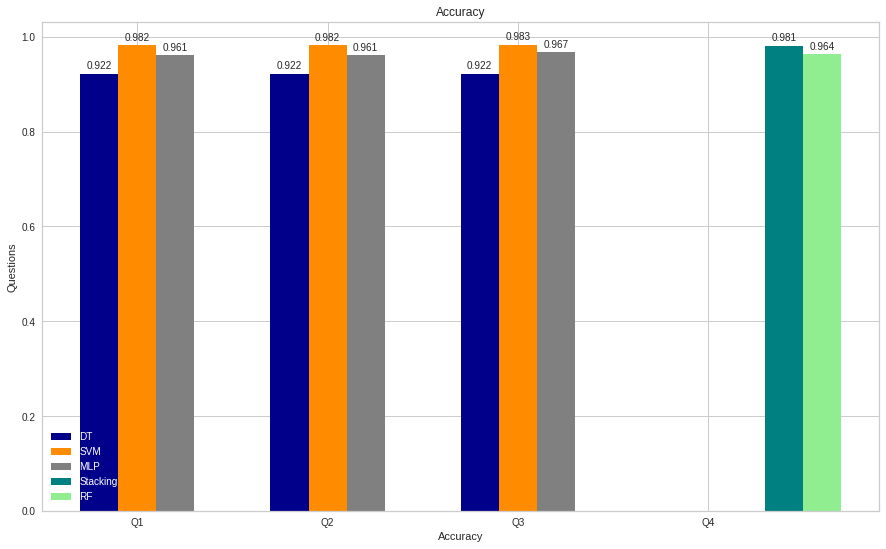

In [ ]:
FinalrResultsBarplot(parts)

## Confusion Matrix for Best two approaches

## SVM in Q3 

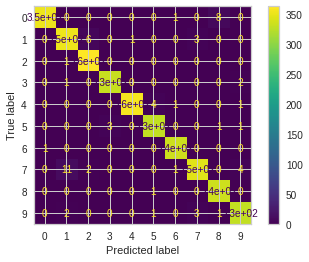

In [ ]:
model = SVC(C=10, random_state=0)
model.fit(trX,trY)
plot_confusion_matrix(model, teX, teY)

## Stacking in Q4

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


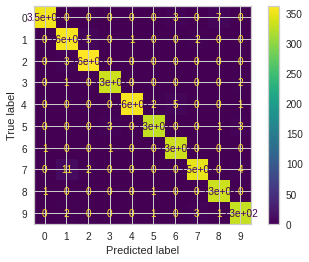

In [ ]:
models = [
  ('mlp', MLPClassifier(learning_rate='adaptive',solver='sgd',random_state=0)),
  ('dt',DecisionTreeClassifier()),
  ('svm',SVC(C=10))
]
model = StackingClassifier(estimators=models)
model.fit(trX,trY)
plot_confusion_matrix(model, teX, teY)